# Question - 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
def getmatrix(filename):
    train = pd.read_csv(filename, delimiter='\t', header= None)
    return train

In [3]:
def putinmatrix(i, main, train):
    main[int(train[0][i]) - 1][int(train[1][i]) - 1] = int(train[2][i])
    return main

In [4]:
train = getmatrix('MovieLens/ml80.train')

In [5]:
main_train = np.zeros((train[0].max(),train[1].max()))

In [6]:
for i in range(train.shape[0]):
    main_train[int(train[0][i]) - 1][int(train[1][i]) - 1] = int(train[2][i])

In [7]:
U, Sigma, V_T = np.linalg.svd(main_train, full_matrices=True)

In [8]:
def pred(U, Sigma, V_T, k):
    U_k = U.T[:k].T
    Sigma_k = np.diag(Sigma[:k])
    V_T_k = V_T[:k]
    A_k = np.dot(np.dot(U_k,Sigma_k),V_T_k)
    return A_k

test = getmatrix('MovieLens/ml20.test')

def err(test, pred):
    error = 0
    for i in range(test.shape[0]):
        diff = (int(test[2][i]) - pred[int(test[0][i]) - 1][int(test[1][i]) - 1])**2
        error = error + diff
    return error

In [9]:
err_list = []
for k in range(0,100):
    pred_k = pred(U, Sigma, V_T, k)
    err_list.append(err(test, pred_k))

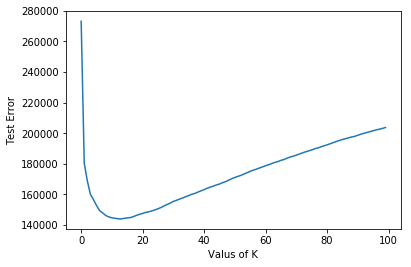

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(100), err_list)
plt.xlabel('Valus of K')
plt.ylabel('Test Error')
plt.show()

### Optimal K seems to be between 10 and 15
### The order of least error lies in 1,40,000 - 1,50,000

## Part - 2

In [75]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [76]:
def func(x,a,b):
    return a*x[0] + b*x[1]

In [77]:
def get_mu(i, train):
    temp = train[train[0] == i][2]
    if temp.shape[0] == 0:
        temp = 0
    else:
        temp = temp.mean()
    return temp

In [78]:
def get_n(j, train):
    temp = train[train[1] == j][2]
    if temp.shape[0] == 0:
        temp = 0
    else:
        temp = temp.mean()
    return temp

In [68]:
X = []
for k in range(train.shape[0]):
    i = train[0][k]
    j = train[1][k]
    X.append([get_mu(i, train),get_n(j, train)])

Y = np.array(train[2])

In [79]:
popt, pcov = curve_fit(func, np.array(X).T, Y)

In [80]:
alpha = popt[0]
beta = popt[1]

In [81]:
def val(alpha, beta, i, j):
    return i*alpha + j*beta

In [82]:
def err_val(test):
    error = 0
    for i in range(test.shape[0]):
        mu = get_mu(int(test[0][i]), train)
        nu = get_n(int(test[1][i]), train)
        
        diff = (int(test[2][i]) - val(alpha, beta, mu, nu))**2
        error = error + diff
    return error

In [84]:
err_val(test)

19052.076144719704

## Least error observed using low rank approximation was much higher than the error obtained by fitting train data to $\alpha*\mu_{i} + \beta*\eta_{j}$